In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.fillna(0, inplace=True)

In [8]:
df['median_house_value'] = np.log(df['median_house_value'])

In [9]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train['median_house_value']
y_val = df_val['median_house_value']
y_test = df_test['median_house_value']

In [12]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [13]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.18,34.63,19.0,3562.0,606.0,1677.0,578.0,4.1573,INLAND
1,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,INLAND
2,-118.26,33.78,27.0,1672.0,491.0,1723.0,462.0,2.0458,NEAR OCEAN
3,-117.33,34.17,5.0,4718.0,1140.0,2564.0,1056.0,2.9877,INLAND
4,-119.02,35.35,42.0,1239.0,251.0,776.0,272.0,1.9830,INLAND
...,...,...,...,...,...,...,...,...,...
12379,-118.19,34.06,32.0,555.0,159.0,748.0,163.0,1.9762,<1H OCEAN
12380,-122.30,37.90,37.0,2125.0,489.0,912.0,462.0,2.9219,NEAR BAY
12381,-118.36,33.90,18.0,3380.0,922.0,2276.0,854.0,4.0727,<1H OCEAN
12382,-119.79,36.78,41.0,2227.0,462.0,1129.0,415.0,2.3190,INLAND


In [14]:
df_train_dict = df_train.to_dict(orient='records')
df_val_dict = df_val.to_dict(orient='records')
df_test_dict = df_test.to_dict(orient='records')

In [15]:
dv = DictVectorizer(sparse=False)

In [16]:
X_train = dv.fit_transform(df_train_dict)

In [17]:
X_val = dv.transform(df_val_dict)
X_test = dv.transform(df_test_dict)

In [18]:
dv.get_feature_names()

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

## Question 1: ocean_proximity=INLAND

In [35]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [39]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



## Question 2: 0.25

In [44]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [48]:
y_pred = rf.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print('RMSE = ', np.sqrt(mse))

RMSE =  0.2453588910676007


## Question 3: 75

In [53]:
scores = []
for n in range(10,201,10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    scores.append((n, np.sqrt(mse)))

In [54]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

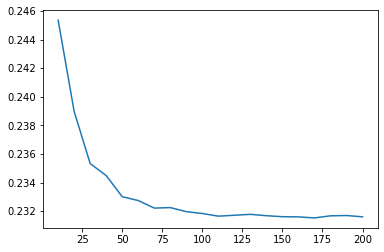

In [58]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

## Question 4:

In [53]:
scores = []
depths = [10, 15, 20, 25]

for depth in depths: 
    for n in range(10,201,10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        scores.append((depth, n, np.sqrt(mse)))

In [54]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [55]:
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.255491
1,10,20,0.253001
2,10,30,0.251680
3,10,40,0.251253
4,10,50,0.250249
...,...,...,...
75,25,160,0.231769
76,25,170,0.231696
77,25,180,0.231870
78,25,190,0.231810


In [59]:
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(4)

rmse                        
max_depth         10      15      20      25
n_estimators                                
10            0.2555  0.2455  0.2463  0.2451
20            0.2530  0.2398  0.2388  0.2387
30            0.2517  0.2376  0.2356  0.2354
40            0.2513  0.2366  0.2346  0.2348
50            0.2502  0.2352  0.2332  0.2333
60            0.2501  0.2352  0.2331  0.2332
70            0.2499  0.2344  0.2325  0.2327
80            0.2496  0.2342  0.2325  0.2326
90            0.2493  0.2340  0.2323  0.2325
100           0.2492  0.2337  0.2321  0.2322
110           0.2489  0.2335  0.2318  0.2318
120           0.2490  0.2336  0.2318  0.2318
130           0.2491  0.2336  0.2319  0.2319
140           0.2492  0.2335  0.2318  0.2319
150           0.2493  0.2334  0.2318  0.2318
160           0.2492  0.2333  0.2318  0.2318
170           0.2490  0.2333  0.2318  0.2317
180           0.2491  0.2334  0.2320  0.2319
190           0.2491  0.2335  0.2320  0.2318
200           0.2491  0.2334  0.2319  0.2317

In [57]:
np.argmin(df_scores.rmse)

79

## Question 5: median_income

In [59]:
rf_ = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf_.fit(X_train, y_train)
rf_.feature_importances_

array([1.68877189e-02, 3.29234611e-02, 1.00635995e-01, 9.68727768e-02,
       3.63889951e-01, 3.06679246e-03, 3.10901161e-01, 3.58566277e-04,
       2.70076860e-04, 4.21955925e-03, 3.00099243e-02, 1.90503564e-02,
       2.09136608e-02])

In [63]:
dv.get_feature_names()[np.argmax(rf_.feature_importances_)]

'median_income'

## Question 6: 0.3

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xgboost as xgb

In [19]:
features = dv.get_feature_names()

In [21]:
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [26]:
features[5] = 'ocean_proximity eq or lower than 1H OCEAN'

In [27]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [28]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [32]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [33]:
s = output.stdout

In [38]:
print(s)

[0]	train-rmse:8.12733	val-rmse:8.13244
[5]	train-rmse:1.40218	val-rmse:1.40740
[10]	train-rmse:0.34481	val-rmse:0.35782
[15]	train-rmse:0.23575	val-rmse:0.26099
[20]	train-rmse:0.21461	val-rmse:0.24532
[25]	train-rmse:0.20356	val-rmse:0.24033
[30]	train-rmse:0.19462	val-rmse:0.23694
[35]	train-rmse:0.18687	val-rmse:0.23540
[40]	train-rmse:0.18073	val-rmse:0.23358
[45]	train-rmse:0.17626	val-rmse:0.23331
[50]	train-rmse:0.17133	val-rmse:0.23297
[55]	train-rmse:0.16535	val-rmse:0.23169
[60]	train-rmse:0.16016	val-rmse:0.23109
[65]	train-rmse:0.15691	val-rmse:0.23059
[70]	train-rmse:0.15374	val-rmse:0.23070
[75]	train-rmse:0.15076	val-rmse:0.22975
[80]	train-rmse:0.14708	val-rmse:0.22903
[85]	train-rmse:0.14429	val-rmse:0.22911
[90]	train-rmse:0.14010	val-rmse:0.22856
[95]	train-rmse:0.13773	val-rmse:0.22823
[99]	train-rmse:0.13522	val-rmse:0.22784



In [39]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [40]:
df_score = parse_xgb_output(output)

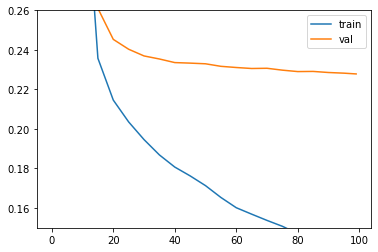

In [44]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.ylim(0.15, 0.26)
plt.legend()

In [46]:
scores = {}

In [47]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [48]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [49]:
s = output.stdout
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [50]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [51]:
s = output.stdout
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

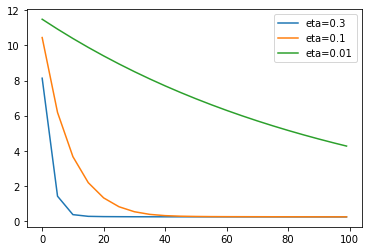

In [52]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.legend()